# Assignment - Naive Bayes

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train = pd.read_csv('SalaryData_Train.csv')

In [12]:
test = pd.read_csv('SalaryData_Test.csv')

In [13]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [15]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [16]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [19]:
col = train.columns[train.dtypes=="object"]
col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [22]:
col1 = test.columns[test.dtypes=="object"]
col1

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for i in col:
    train[i] = le.fit_transform(train[i])

In [25]:
for i in col1:
    test[i] = le.fit_transform(test[i])

In [26]:
test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [27]:
train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

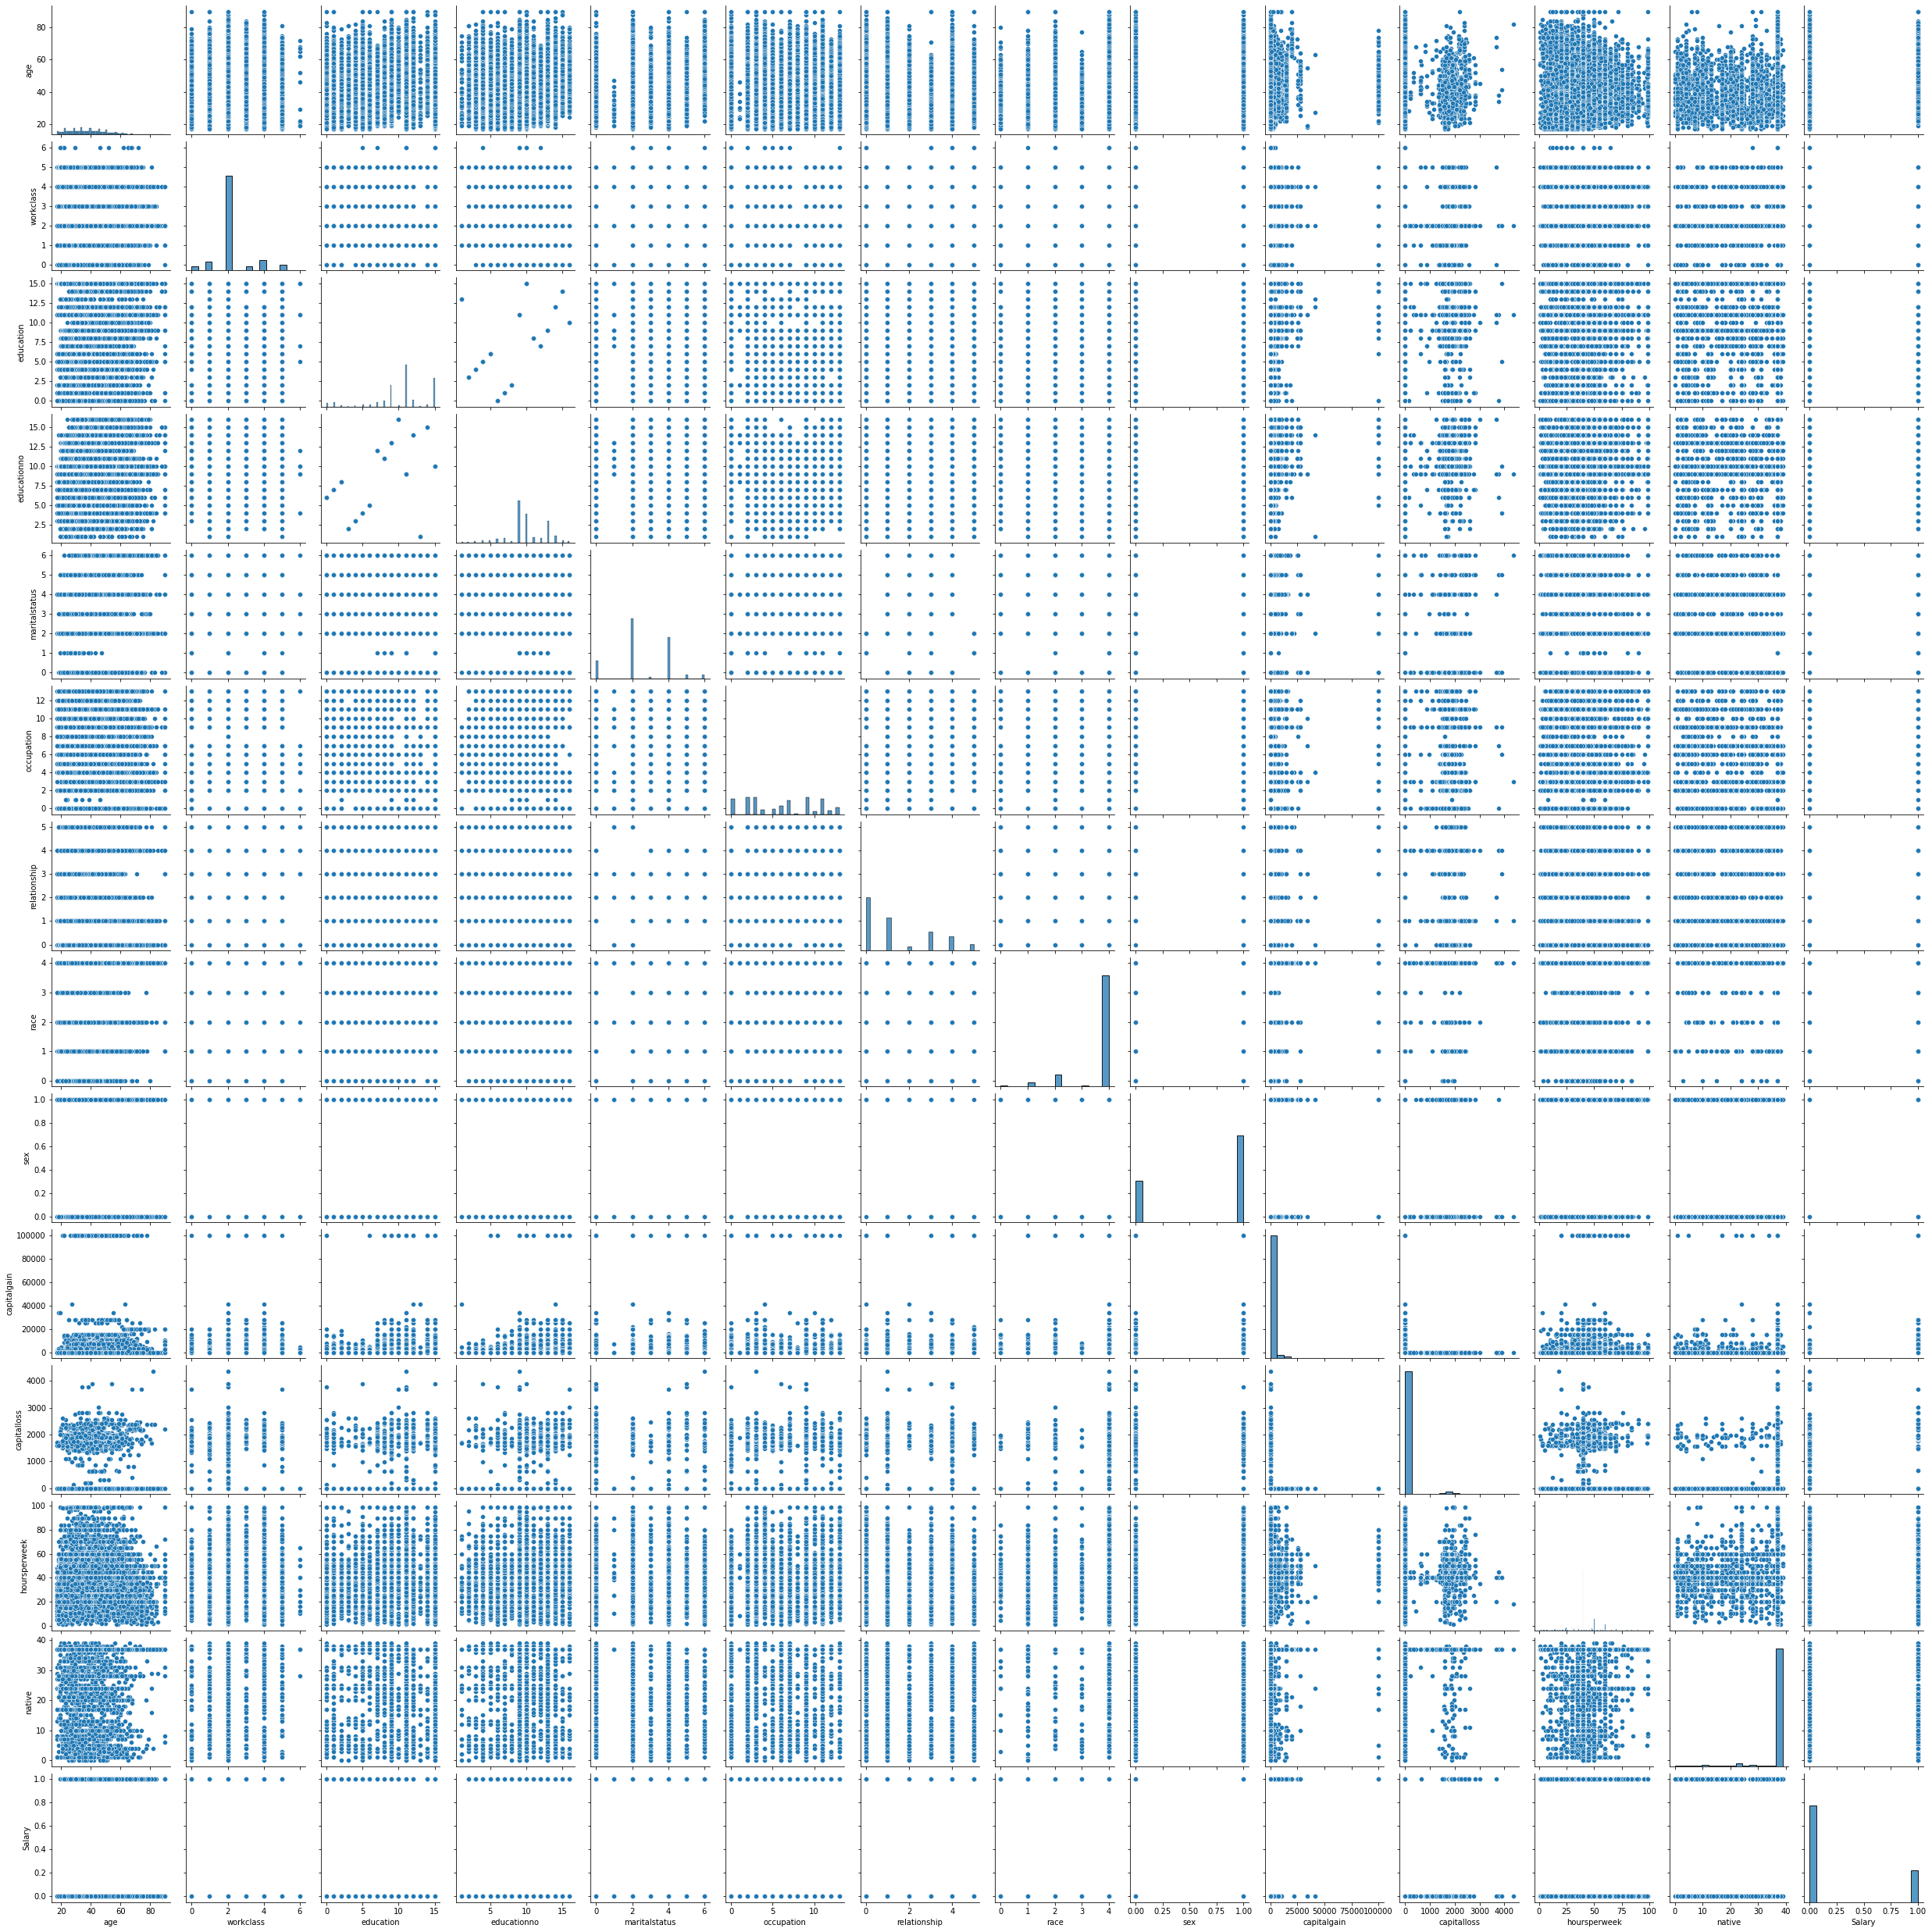

In [29]:
sns.pairplot(train)

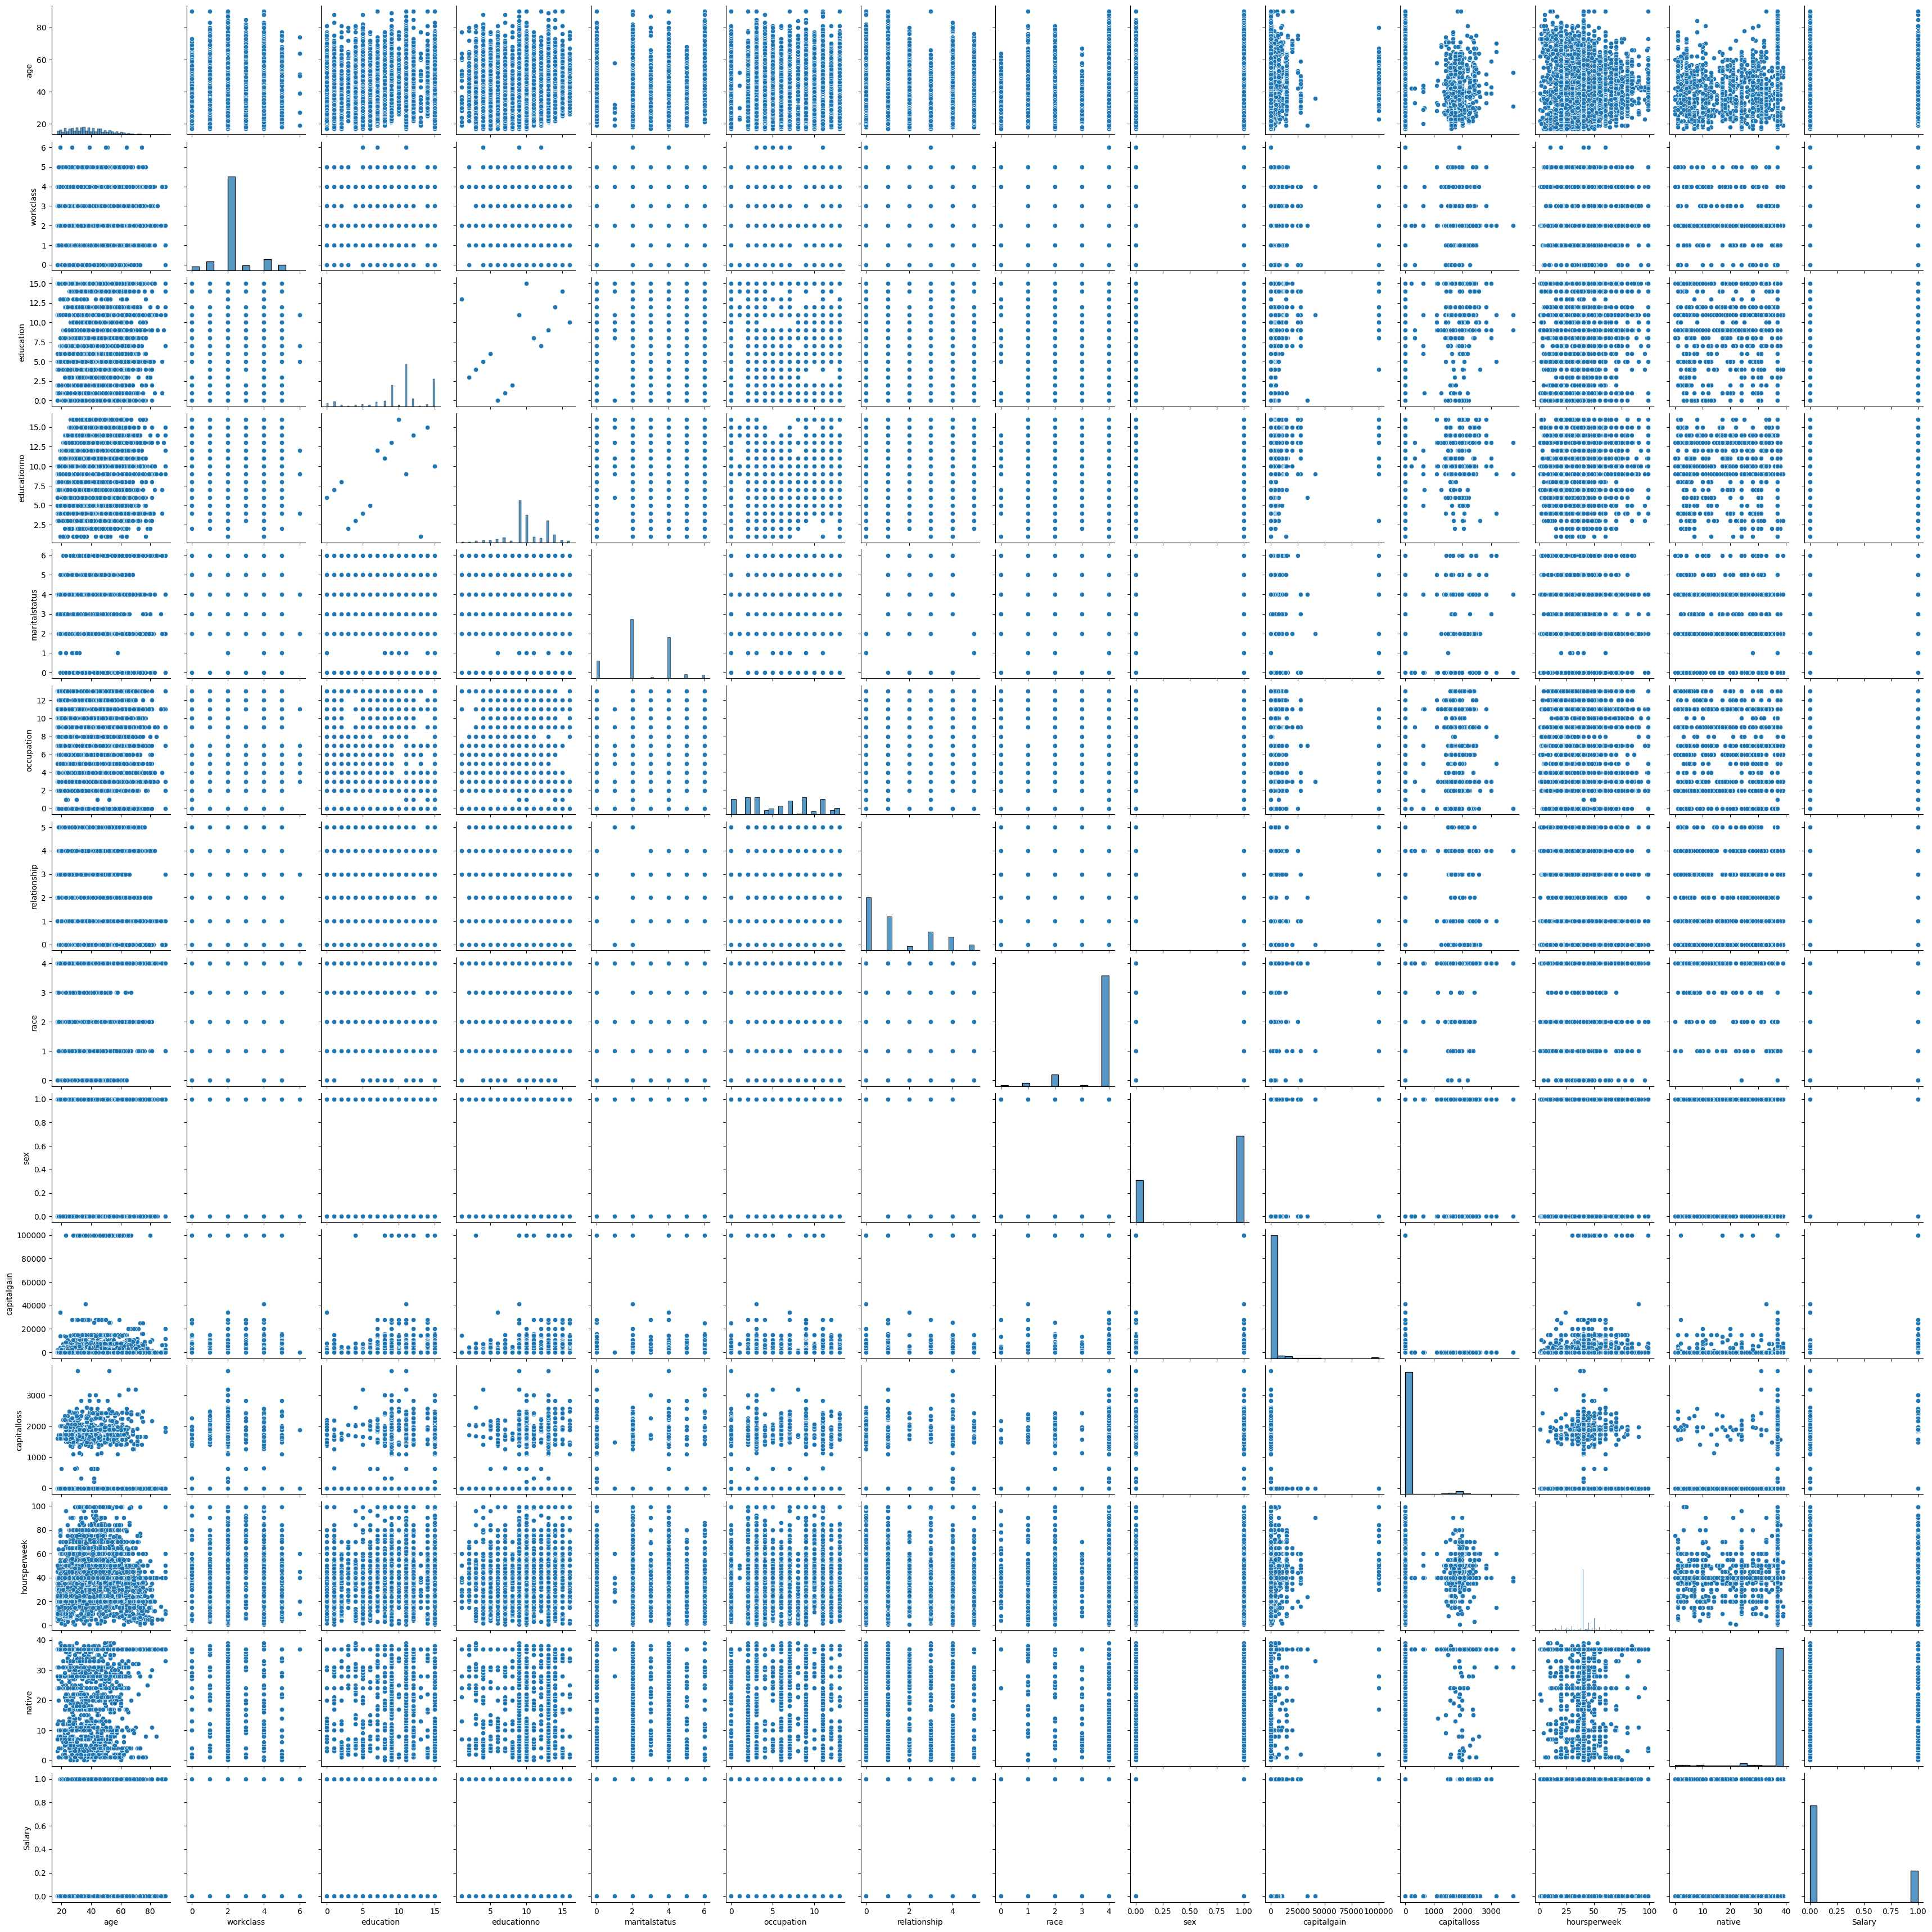

In [30]:
sns.pairplot(test)

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

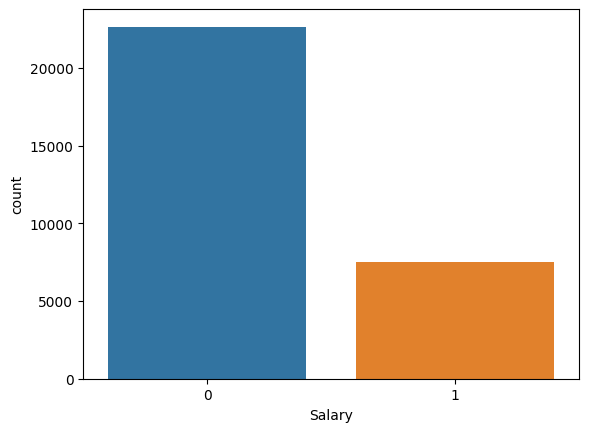

In [31]:
sns.countplot(train['Salary'])

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

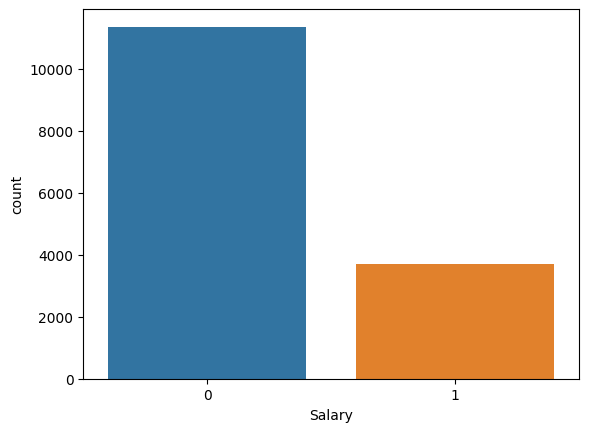

In [32]:
sns.countplot(test['Salary'])

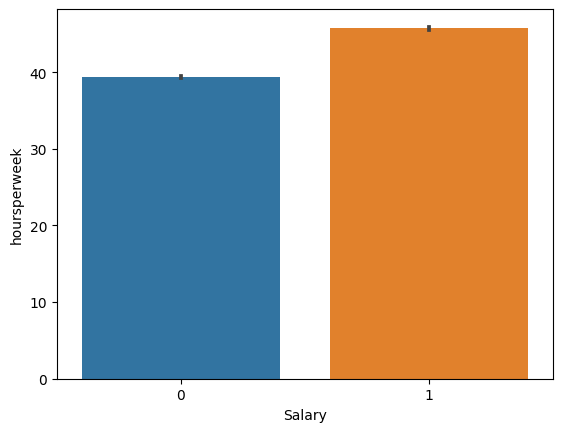

In [33]:
sns.barplot(x='Salary', y='hoursperweek', data=train)
plt.show()

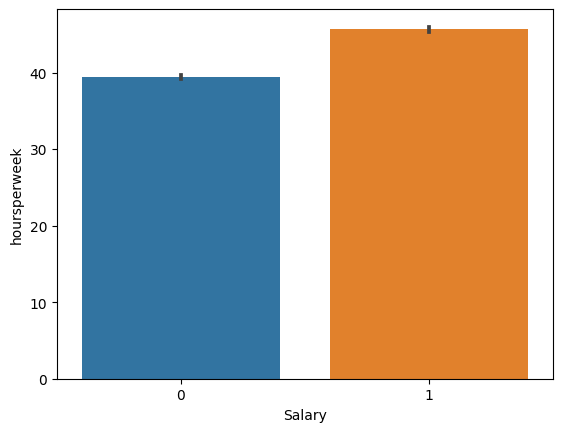

In [34]:
sns.barplot(x='Salary', y='hoursperweek', data=test)
plt.show()

<AxesSubplot:ylabel='Salary'>

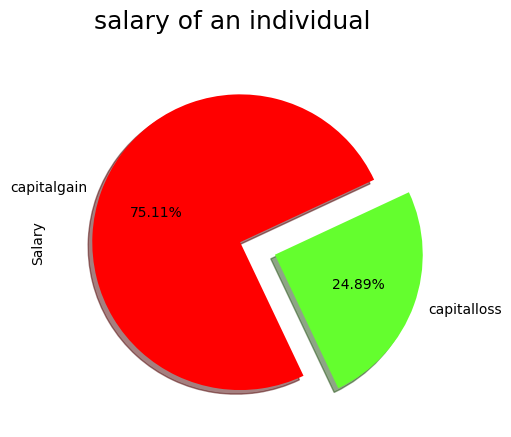

In [39]:
colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=18)

train["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,labels=labels, fontsize=10, startangle=25)
         

<AxesSubplot:ylabel='Salary'>

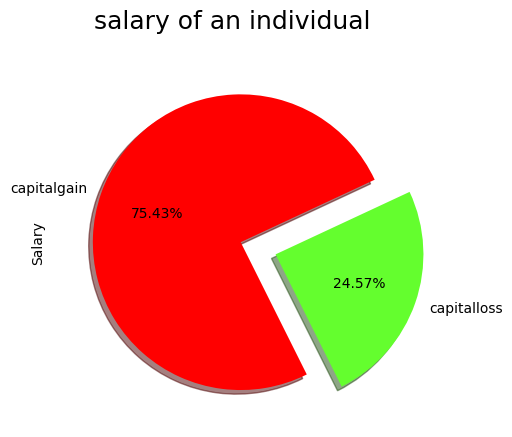

In [40]:
colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=18)

test["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,labels=labels, fontsize=10, startangle=25)
         

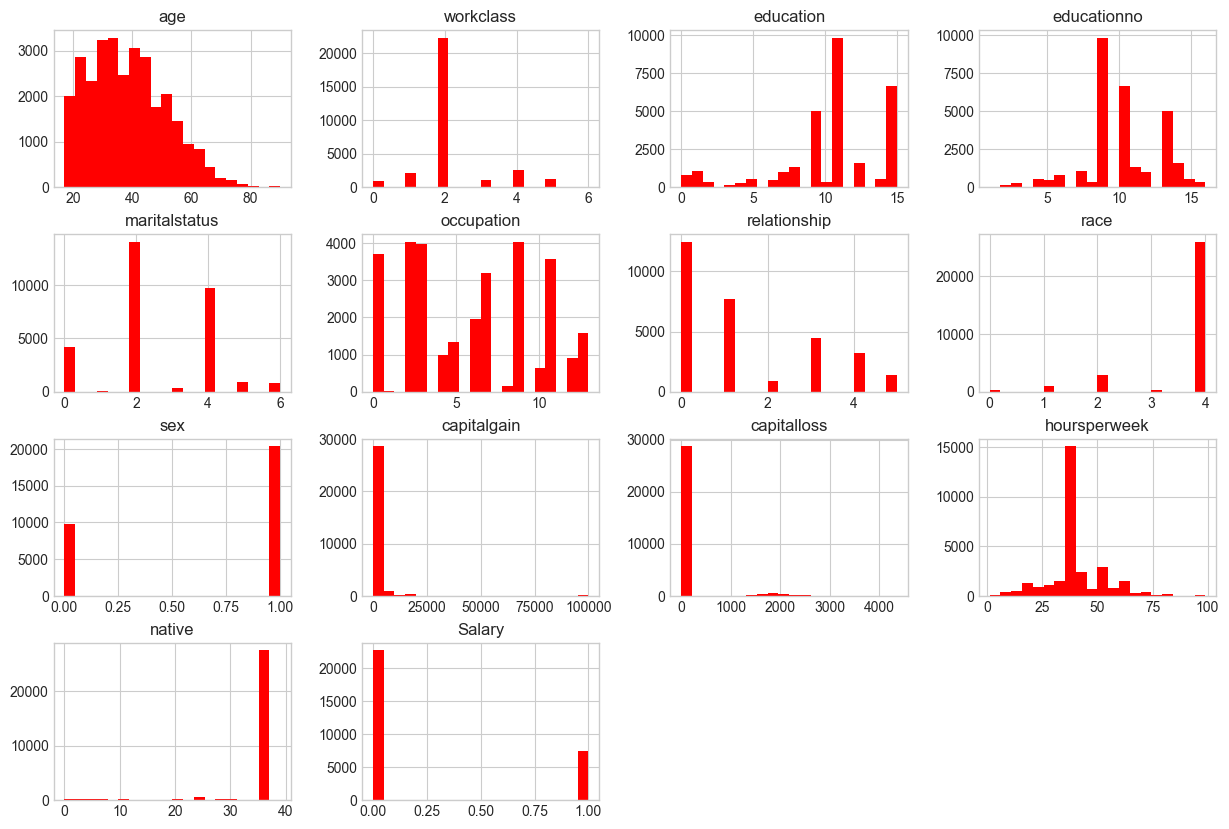

In [41]:
plt.style.use('seaborn-whitegrid')

train.hist(bins=20, figsize=(15,10), color='red')
plt.show()

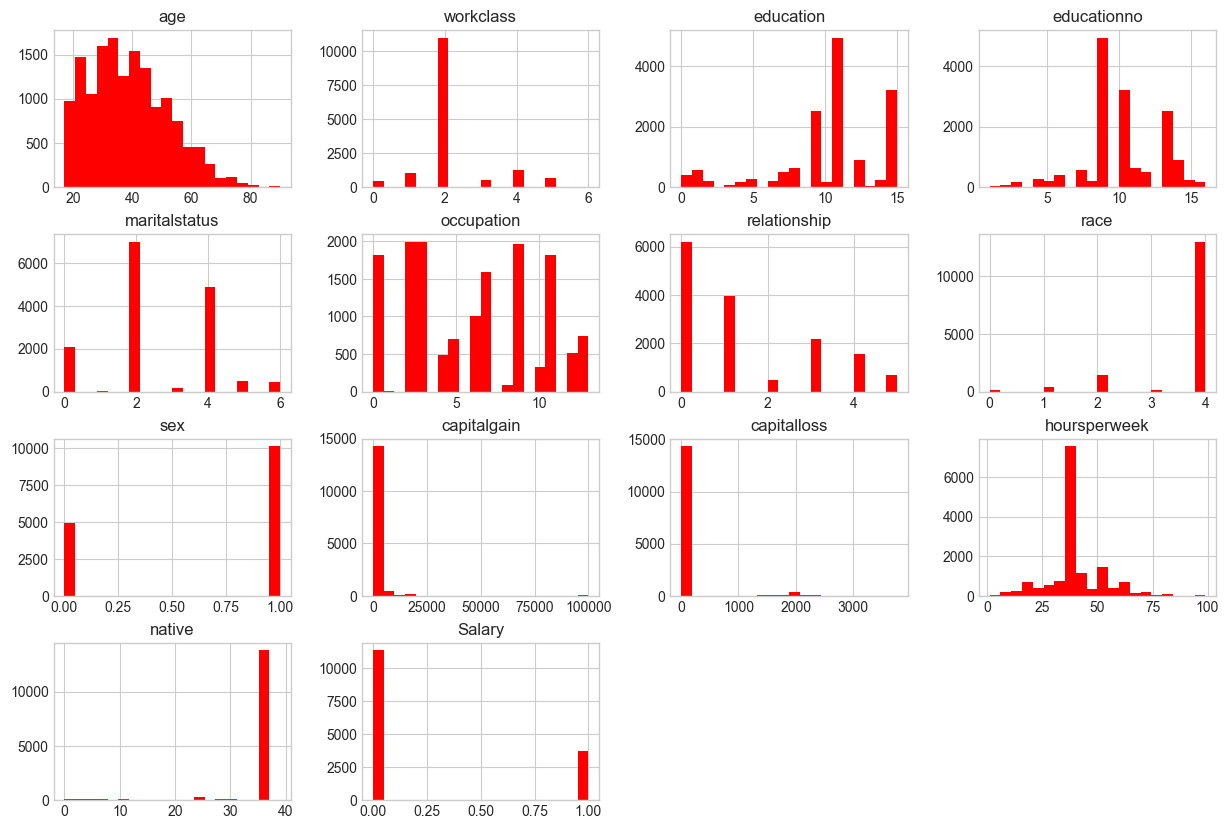

In [42]:
plt.style.use('seaborn-whitegrid')

test.hist(bins=20, figsize=(15,10), color='red')
plt.show()

# Train Test split

In [43]:
X_train=train.drop('Salary',axis=1).values
y_train = train.Salary

In [44]:
X_test=test.drop('Salary',axis=1).values
y_test = test.Salary

In [51]:
X_train.shape,X_test.shape

((30161, 13), (15060, 13))

In [50]:
y_test.shape,y_train.shape

((15060,), (30161,))

# Applying naive bayes for classification

In [52]:
from sklearn.naive_bayes import GaussianNB
Gnbmodel=GaussianNB()

In [53]:
train_pred_gau=Gnbmodel.fit(X_train,y_train).predict(X_train)
train_pred_gau


array([0, 0, 0, ..., 0, 0, 1])

In [54]:
test_pred_gau=Gnbmodel.fit(X_train,y_train).predict(X_test)
test_pred_gau

array([0, 0, 0, ..., 0, 1, 0])

In [55]:
train_acc_gau=np.mean(train_pred_gau==y_train)


In [56]:
test_acc_gau=np.mean(test_pred_gau==y_test)


In [57]:
train_acc_gau


0.7953317197705646

In [58]:
test_acc_gau


0.7946879150066402

# Multinomial naive bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
Mnbmodel=MultinomialNB()


In [60]:
train_pred_multi=Mnbmodel.fit(X_train,y_train).predict(X_train)
train_pred_multi

array([1, 0, 0, ..., 0, 0, 1])

In [61]:
test_pred_multi=Mnbmodel.fit(X_train,y_train).predict(X_test)
test_pred_multi

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.7729186698053778

In [63]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi

0.7749667994687915